In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #importing data and setting it in a data frame and tools 
import seaborn as sns
%matplotlib inline

In [2]:
#loading dataset and extracting independant(x) and dependant(y) variables
companies=pd.read_csv('1000_Companies.csv')
x = companies.iloc[:,:-1].values #take every row except for the last column
#x is no longer a pandas dataset
#data are extracted easily using this [:,:-1].values
y = companies.iloc[:,4].values
#y is the last row

companies.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


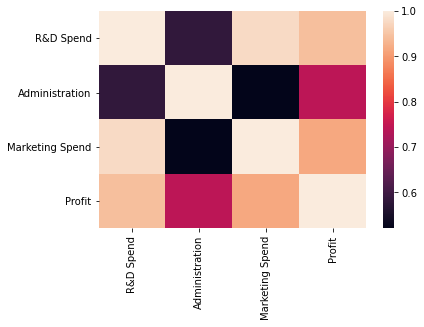

In [3]:
#Data visualization
#Building the correlation matrix
#sns pandas, seaborn as sns
#seaborn understands pandas dataframe
sns.heatmap(companies.corr())

In [4]:
#dark rows or dark columns shows lowest corresponding data
#light rows or light columns shows highest corresponding data --more connection between data
#according to the scale at the right

In [5]:
#set up linear regression model in two steps

#1.Encoding categorical data
!pip install --upgrade category_encoders


Requirement already up-to-date: category_encoders in f:\s.downloads\anaconda\lib\site-packages (2.2.2)


In [6]:
print(x)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 ...
 [100275.47 241926.31 227142.82 'California']
 [128456.23 321652.14 281692.32 'California']
 [161181.72 270939.86 295442.17 'New York']]


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import category_encoders as ce
#labelencoder = LabelEncoder()

#This creates a class that we can reuse to transfer the labels back and forth

#x[:,3]= labelencoder.fit_transform(x[:,3]) #changes states(label) to numbers [3rd-0,1,2,3(4th column)]

#onehotencoder=OneHotEncoder(categorical_features = x[3])#handle_unknown='ignore')# or default='error'  #categorical_features = 'auto').fit(x)
#categorical_features is depreciated in .20 and will be removed in .22
#onehotencoder=ColumnTransformer([('State',OneHotEncoder(categories='auto'),[3])])#,remainder='passthrough')
#onehotencoder=ce.OneHotEncoder(handle_unknown='return_nan',return_df=True,use_cat_names=True)

#handle_unknown='ignore'
#x= onehotencoder.fit_transform(x)#.toarray()

#final transformation sets us the data in a way we need it to be,simply a row of numbers
#now x is an array of arrays and each array is row of numbers
#print(x)


In [8]:
labelencoder=LabelEncoder()
#companies['State']
x[:,3]=labelencoder.fit_transform(companies['State'])
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [3])], remainder='passthrough')

In [9]:
companies = np.array(columnTransformer.fit_transform(companies))#, dtype = np.str)

In [10]:

print(x)

[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 ...
 [100275.47 241926.31 227142.82 0]
 [128456.23 321652.14 281692.32 0]
 [161181.72 270939.86 295442.17 2]]


In [11]:
x=x.astype(np.float)

In [12]:
print(x)

[[1.6534920e+05 1.3689780e+05 4.7178410e+05 2.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 1.0000000e+00]
 ...
 [1.0027547e+05 2.4192631e+05 2.2714282e+05 0.0000000e+00]
 [1.2845623e+05 3.2165214e+05 2.8169232e+05 0.0000000e+00]
 [1.6118172e+05 2.7093986e+05 2.9544217e+05 2.0000000e+00]]


In [13]:
#removing dummy index column
x=x[:,1:]
print(x)

[[1.3689780e+05 4.7178410e+05 2.0000000e+00]
 [1.5137759e+05 4.4389853e+05 0.0000000e+00]
 [1.0114555e+05 4.0793454e+05 1.0000000e+00]
 ...
 [2.4192631e+05 2.2714282e+05 0.0000000e+00]
 [3.2165214e+05 2.8169232e+05 0.0000000e+00]
 [2.7093986e+05 2.9544217e+05 2.0000000e+00]]


In [14]:
#linear regression model
#1.Training set
#2.Testing set

#splitting the dataset into the training set and the testing set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
#0.2 means 20% of the rows are gonna be tested,put aside as test set
#thus out of 1000 lines of dataset 200 are putaside and that 200 are picked randomly , random_state = 0

In [15]:
#now creating the linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #LinearRegression class contains that math built in for the computation
regressor.fit(x_train,y_train)

LinearRegression()

In [21]:
#use the model now
y_pred=regressor.predict(x_test)
y_pred
#for the 200 test variables we're gonna get 200 answers

array([ 90209.64901318,  88876.28325862,  95200.74973042, 174739.58503941,
        84013.74722284, 110572.81423949, 169438.58451208,  91855.1682484 ,
       163402.29005648,  54991.76617392,  67874.72481309, 150180.9861358 ,
       126512.60670878,  60430.86889281, 175991.46628657,  76097.46542299,
       118577.95366564, 163338.33779446, 165329.70854714, 180487.66382609,
       101238.40282718,  86180.18269683, 179933.75346041,  84689.06190888,
       105088.13051962, 101399.34780971,  40828.42858138,  58070.59626831,
        69777.85472814, 226802.72627013, 121052.52594777, 111658.45981284,
       101689.86321283, 137852.59801618,  64960.45224275, 108854.95146996,
       184345.94907957, 170595.15880734, 173725.92497117, 118014.06326024,
        97038.60706862, 164196.76013804, 107746.47058118,  52030.50278345,
       116882.08703837,  59741.11018494, 157857.27897357,  79750.07622713,
       159139.45816291, 131182.41311202, 183735.81760226, 173691.52102156,
        94077.16471212,  

In [22]:
#calculation the coefficients and the intercepts
print(regressor.coef_)

[   1.04239904    0.35510511 -320.45531609]


In [23]:
print(regressor.intercept_)

-88623.7652734379


In [24]:
#evaluating the model
#calculating r square value 
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.8985038788872524

In [20]:
#r squared value of 0.91 proves the model is a good model
#success